# Dataset 1

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("rawdata/2018_Financial_Data.csv")
# Change to int
df.head()

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


There is a large amount of attributes. We will be looking at a few important attributes that help determine the 'Class' classification.

In [171]:
indicators = ['priceCashFlowRatio',
              'priceEarningsRatio',
              'priceEarningsToGrowthRatio',
              'priceBookValueRatio',
              'currentRatio',
              'quickRatio',
              'payoutRatio',
              'Class']

df = df[indicators]
df.describe()

,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceBookValueRatio,currentRatio,quickRatio,payoutRatio,Class
count,3136.000000,4140.000000,2734.000000,3.562000e+03,4141.000000,4143.000000,4136.000000,4392.000000
mean,216.288905,24.042168,47.514074,3.047972e+04,4.271089,4.073948,0.287859,0.693534
std,9920.994151,105.518285,272.896415,1.817262e+06,57.612570,70.098656,5.088971,0.461078
min,0.000000,0.000000,0.000000,0.000000e+00,-1.203000,0.000000,-128.000000,0.000000
25%,5.625695,0.000000,10.439278,9.932500e-01,0.871000,0.571537,0.000000,0.000000
50%,9.891164,10.761150,16.295242,1.707800e+00,1.662000,1.142864,0.000000,1.000000
75%,17.046144,20.462250,28.253637,3.471425e+00,3.016000,2.298005,0.320250,1.000000
max,554582.170643,3842.000000,9704.250000,1.084587e+08,3192.192308,3180.813708,212.800000,1.000000


In [172]:
df.dtypes

priceCashFlowRatio            float64
priceEarningsRatio            float64
priceEarningsToGrowthRatio    float64
priceBookValueRatio           float64
currentRatio                  float64
quickRatio                    float64
payoutRatio                   float64
Class                           int64
dtype: object

In [173]:
df.isna().sum()

priceCashFlowRatio            1256
priceEarningsRatio             252
priceEarningsToGrowthRatio    1658
priceBookValueRatio            830
currentRatio                   251
quickRatio                     249
payoutRatio                    256
Class                            0
dtype: int64

First we have to deal with NaN data in the dataset. We will drop the rows that do not have all the values we need.

In [174]:
df.fillna(df.mean(), inplace=True)
df.count()

priceCashFlowRatio            4392
priceEarningsRatio            4392
priceEarningsToGrowthRatio    4392
priceBookValueRatio           4392
currentRatio                  4392
quickRatio                    4392
payoutRatio                   4392
Class                         4392
dtype: int64

In [175]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
df = df[~((df < (q1 - 1.5*iqr)) |(df > (q3 + 1.5*iqr))).any(axis=1)]

df.describe()

,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceBookValueRatio,currentRatio,quickRatio,payoutRatio,Class
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,58.324740,11.986689,27.384040,2.677538,1.857089,1.329386,0.133956,0.689876
std,85.688485,12.325746,16.683176,3.030099,1.421385,1.200525,0.204186,0.462637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000849,-0.424000,0.000000
25%,7.161928,0.000000,12.269753,0.971400,0.889000,0.479232,0.000000,0.000000
50%,12.507553,10.743100,21.667227,1.636300,1.581000,1.024933,0.000000,1.000000
75%,41.591220,18.111400,47.514074,3.194350,2.558000,1.827450,0.262500,1.000000
max,471.980328,59.296600,79.039946,20.125200,7.443545,5.954492,0.732000,1.000000


In [176]:
df.to_csv(r'processeddata/2018_Financial_Data.csv')

End of cleanup

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ded9cd0>,
      dtype=object)

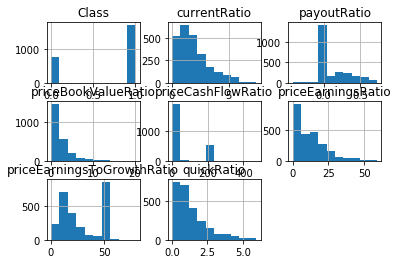

In [177]:
df.hist()

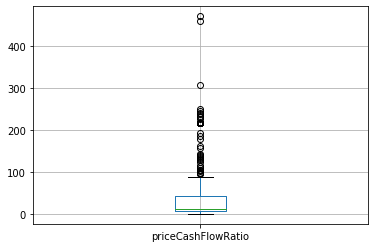

In [178]:
df.boxplot(column=['priceCashFlowRatio'])

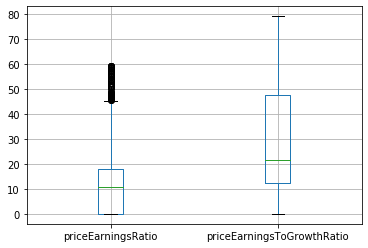

In [179]:
df.boxplot(column=['priceEarningsRatio', 'priceEarningsToGrowthRatio'])

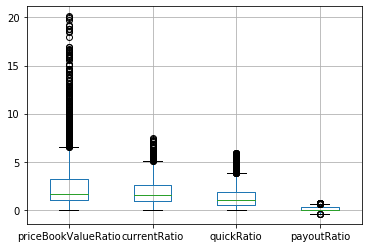

In [180]:
df.boxplot(column=['priceBookValueRatio', 'currentRatio', 'quickRatio', 'payoutRatio'])

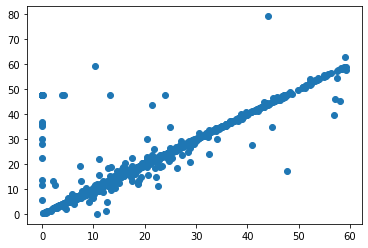

In [182]:
plt.scatter(x=df['priceEarningsRatio'], y=df['priceEarningsToGrowthRatio'])

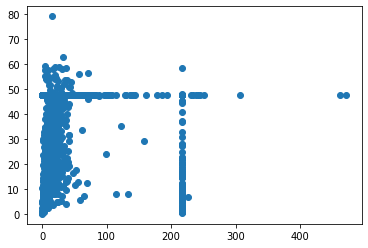

In [192]:
plt.scatter(x=df['priceCashFlowRatio'], y=df['priceEarningsToGrowthRatio'])

In [ ]:
plt.scatter(x=df['priceEarningsRatio'], y=df['priceEarningsToGrowthRatio'])

There are quite a number of outliers. To see what is happening, we have to look at the distributions.

# Dataset 2

This dataset includes daily stock market data for Aaple.

In [185]:
df2 = pd.read_csv("rawdata/aapl.us.txt")
df2.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [116]:
df2.describe()

,Open,High,Low,Close,Volume,OpenInt
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.0
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,0.0
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.0
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,0.0
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,0.0
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,0.0


First we see that the count is consistent across all columns. This means there are no NaN values we have to worry about. We can see that the OpenInt column is useless and we want the Date column to be our index since it is a time series. We also see that for Open, High, Low, and Close, there is a large max outlier. We will have to look at some distributions to see what is happening.

In [117]:
df2.set_index("Date", inplace=True)
df2.drop(columns=['OpenInt'], inplace=True)

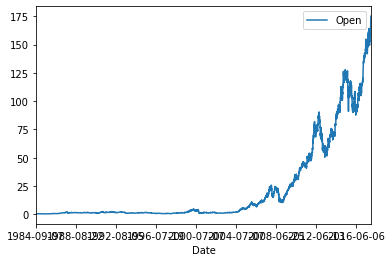

In [118]:
df2.plot(y="Open")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a238fdf10>,
      dtype=object)

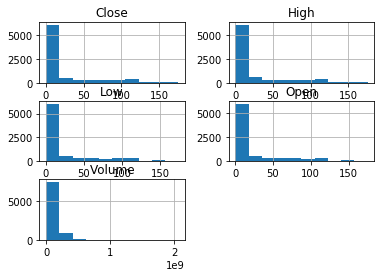

In [119]:
df2.hist()

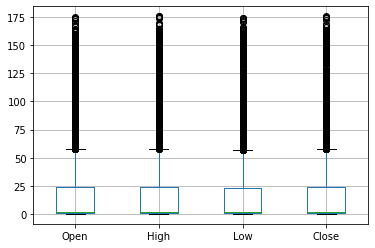

In [120]:
df2.boxplot(column=["Open", "High", "Low", "Close"])

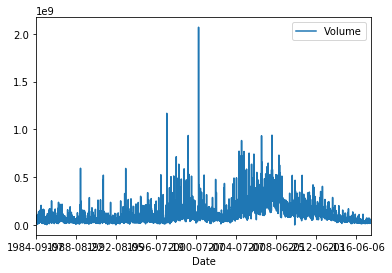

In [121]:
df2.plot(y="Volume")

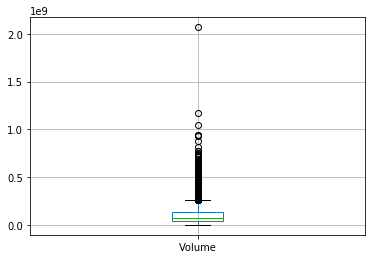

In [122]:
df2.boxplot(column="Volume")

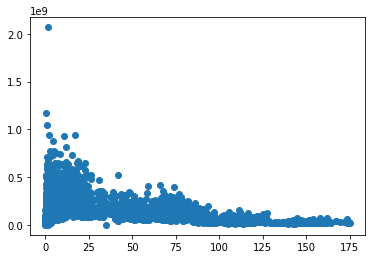

In [123]:
plt.scatter(x=df2['Open'], y=df2['Volume'])

## Analysis
From these findings, we see that there is a positive exponential trend of Apple's stock prices over the years. Much of the data is skewed towards the low stock prices before around the 2000s. Many of the outliers according to the boxplot are the largest, most recent data. This poses a problem as we want to predict prices in more recent times. To fix this, we will throw out the data before 2007 (the year of the iPhone creation) to get a better representation of modern Apple trends.

Interestingly, there also seems to be a negative exponential trend when comparing the Open price in relation to the the Volume. We can use the Volume for prediction as well.

In [124]:
toDrop = []
for index, row in df2.iterrows():
    if index[:4] == '2007':
        break
    toDrop.append(index)

df2.drop(toDrop, inplace=True)
df2.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,11.049,11.087,10.486,10.731,345302870
2007-01-04,10.780,11.007,10.733,10.969,236252357
2007-01-05,10.992,11.038,10.807,10.893,232773093
2007-01-08,11.011,11.081,10.922,10.946,222149027
2007-01-09,11.075,11.907,10.906,11.854,933759387


In [125]:
df2.describe()

,Open,High,Low,Close,Volume
count,2736.000000,2736.000000,2736.000000,2736.000000,2.736000e+03
mean,64.313843,64.891892,63.681515,64.305140,1.370447e+08
std,41.547584,41.811585,41.277361,41.558909,1.114389e+08
min,10.180000,10.500000,10.014000,10.014000,0.000000e+00
25%,24.310000,24.517000,23.975250,24.310000,5.373976e+07
50%,58.297000,58.787500,57.528000,58.204000,1.085332e+08
75%,96.659250,97.379500,95.792250,96.647250,1.834531e+08
max,175.110000,175.610000,174.270000,175.610000,9.396953e+08


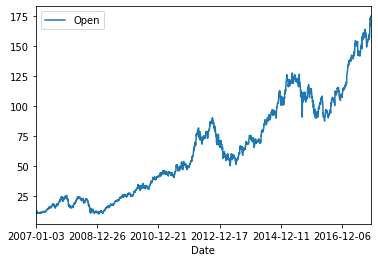

In [126]:
df2.plot(y="Open")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a277bb750>,
      dtype=object)

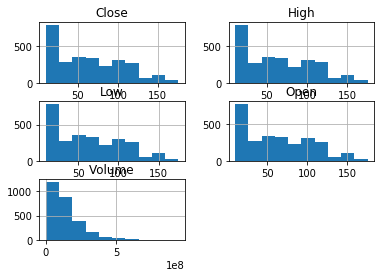

In [127]:
df2.hist()

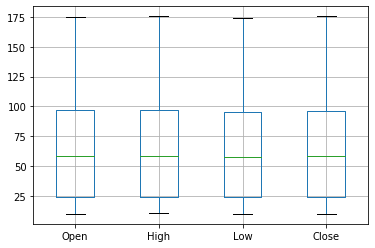

In [128]:
df2.boxplot(column=["Open", "High", "Low", "Close"])

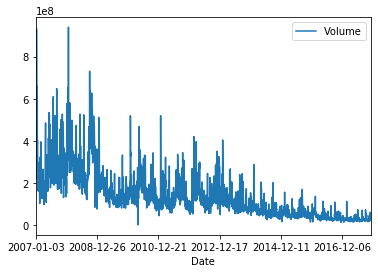

In [129]:
df2.plot(y="Volume")

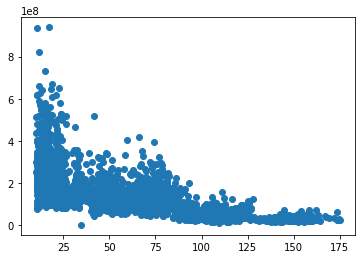

In [130]:
plt.scatter(x=df2['Open'], y=df2['Volume'])

After processing, we can see the graphs are much more manageable and that there is further evidence supporting the trend of Volume to the Open value as we now see a downwards trend in Volume as the years go by.

In [133]:
df2.to_csv("processeddata/aapl.us.csv")